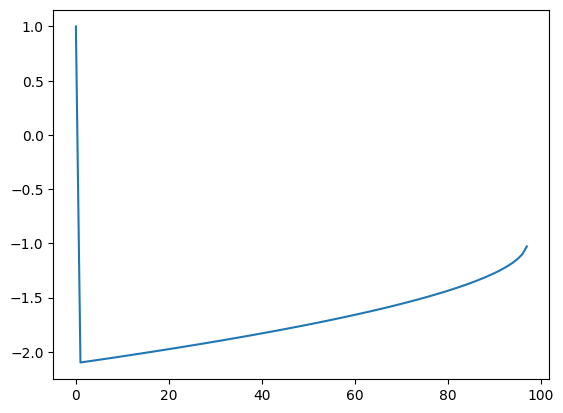

In [26]:
import numpy as np
import diffrax
import jax
import jax.numpy as jnp
import jax.scipy.stats as stats
from jax.scipy.special import gammaln
from time import time
from jax import grad
import matplotlib.pyplot as plt
jax.config.update("jax_enable_x64", True)
a = 0.7
b = 0.8
tau = 12.5
I = 1.3
tSpan = jnp.linspace(0, 200, 1000)
par = jnp.array([a,b,tau,I])
V = 0.0
W = 0.0
IC = state = jnp.array([V,W])
def RHS(t,state,par):
    V,W = state
    a,b,tau,I = par
    return jnp.array([V - (V**3)/3.0 - W + I, (1/tau)*(V+a-b*W)])    
terms = diffrax.ODETerm(RHS)
solver = diffrax.Dopri8()
t0 = tSpan[0]
t1 = tSpan[-1]
dt0 = 1e-4
tolerance = 1e-6
y0 = state
saveat = diffrax.SaveAt(ts=tSpan)
stepsize_controller = diffrax.PIDController(rtol=tolerance, atol=tolerance)       
sol = diffrax.diffeqsolve(terms,solver,t0,t1,dt0,y0,args = (par),saveat=saveat,stepsize_controller=stepsize_controller,max_steps = int(1e8))
plt.plot(sol.ts[:350],sol.ys[:350,0])